In [1]:
import pandas as pd
import numpy as np
from glob import glob
import compress_json
import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [7]:
def load_results(path:str) -> pd.DataFrame:
    df = pd.read_csv(path, dtype=float)
    _, graph, library, _ = path.split(os.sep)
    
    termination = "nominal"
    if np.isclose(df.iloc[-1], 0).all():
        df = df.head(-1)  
    elif np.isclose(df.iloc[-1], -1).all():
        df = df.head(-2)
        termination = "exception"
    else:
        termination = "killed"
        
    plt.plot(df.ram)
    plt.title("Library {}, Graph {}".format(library, graph))
    plt.show()
        
    if (df<0).any().any():
        raise ValueError("Negative values in {}".format(path))
    
    df["graph"] = graph
    df["library"] = library
    df["termination"] = termination

    return df

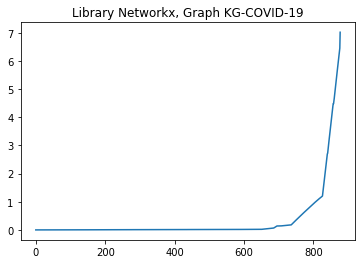

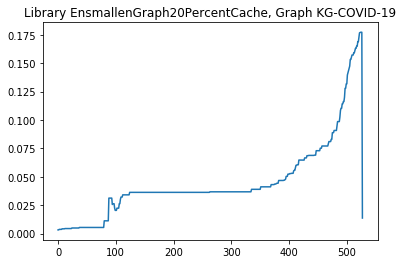

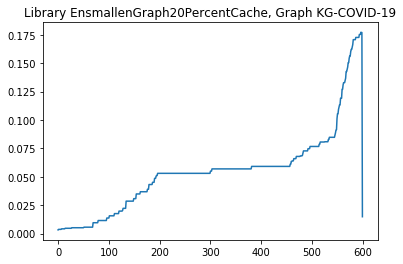

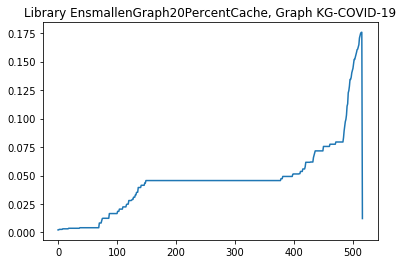

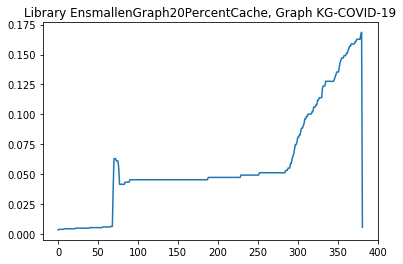

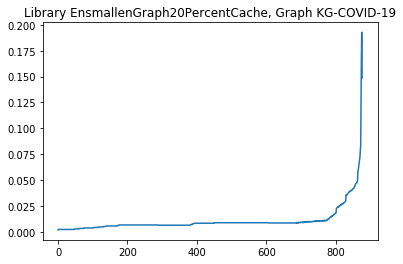

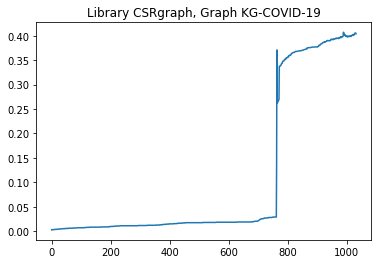

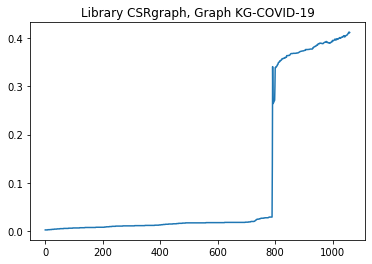

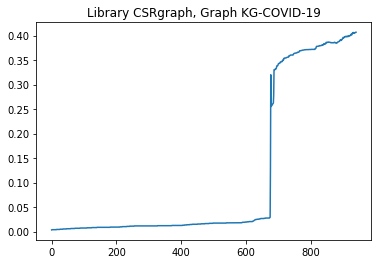

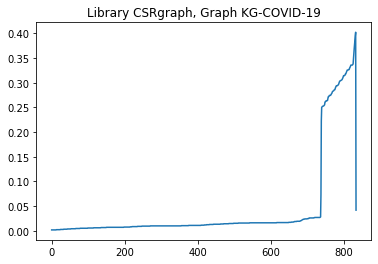

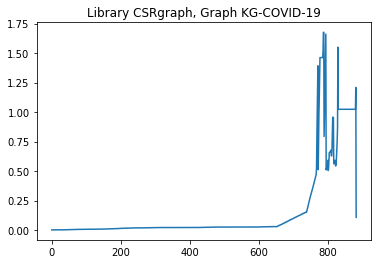

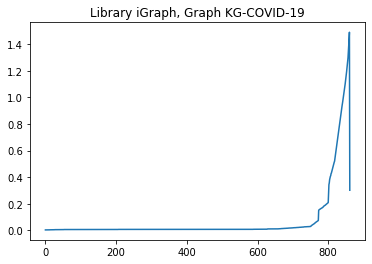

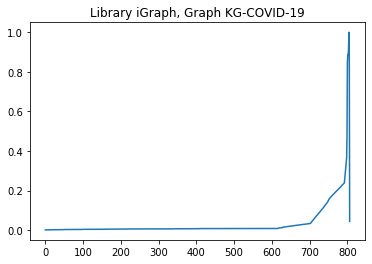

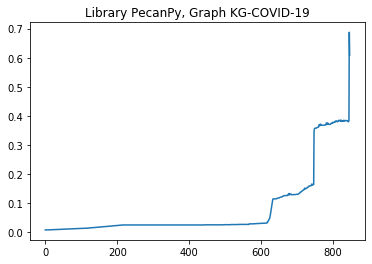

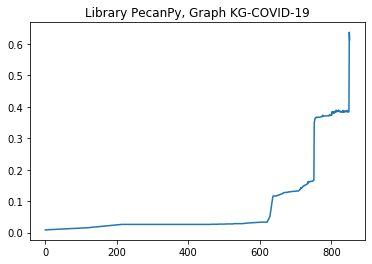

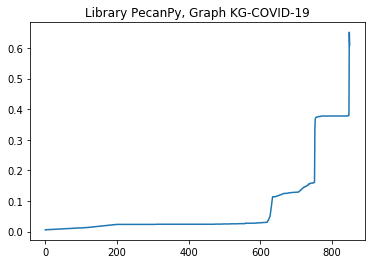

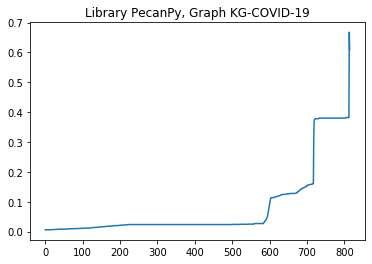

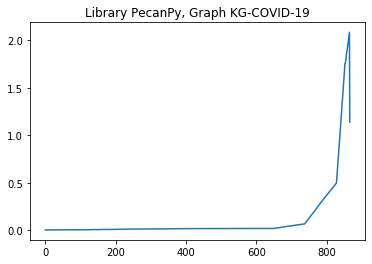

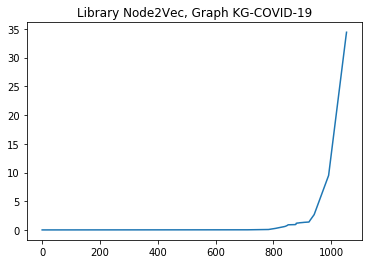

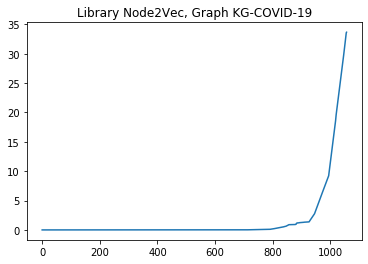

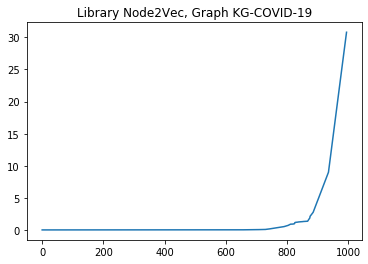

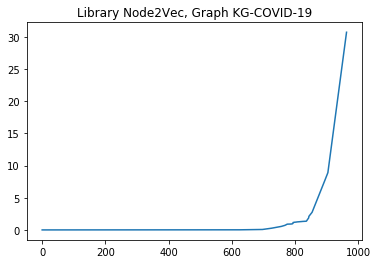

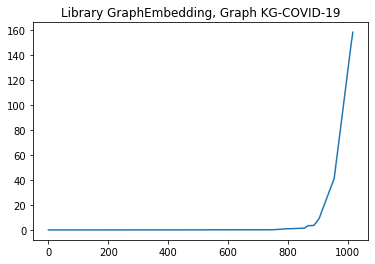

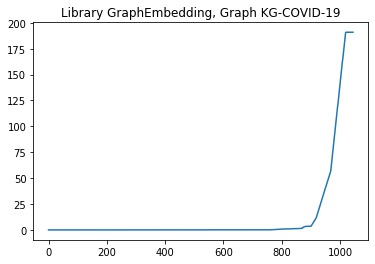

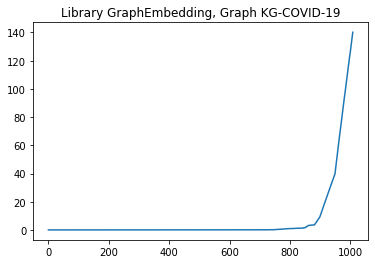

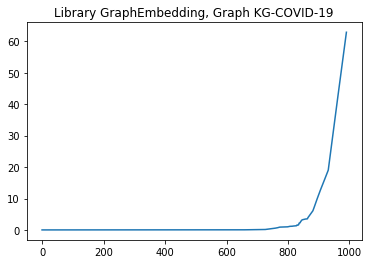

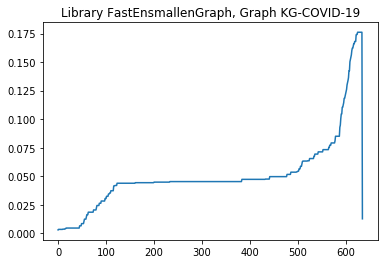

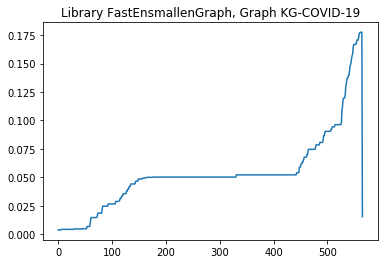

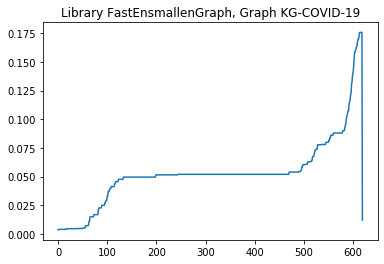

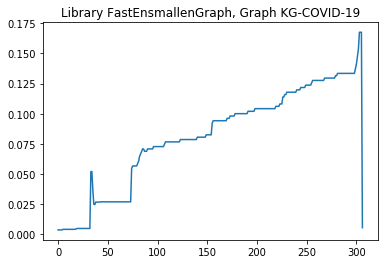

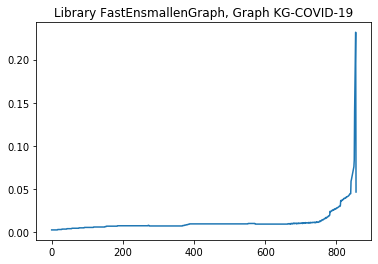

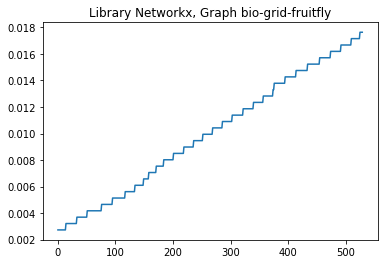

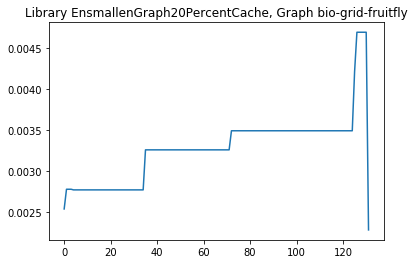

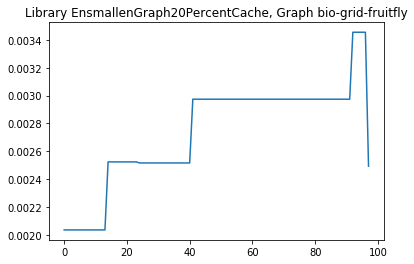

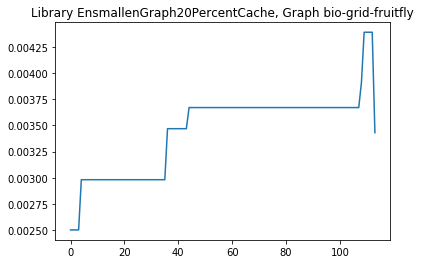

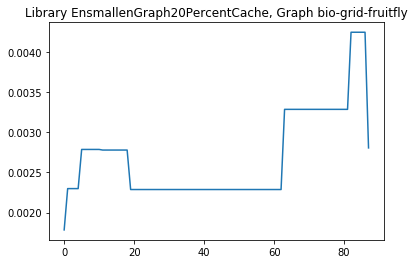

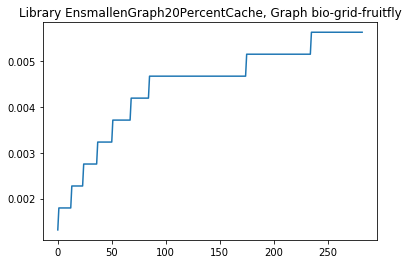

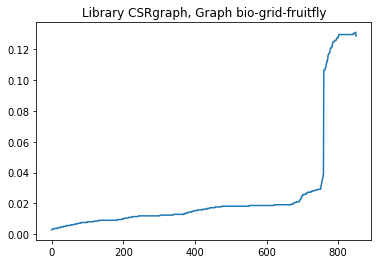

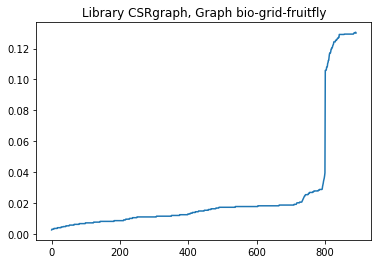

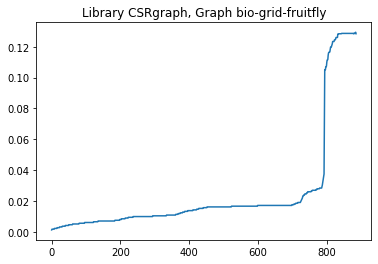

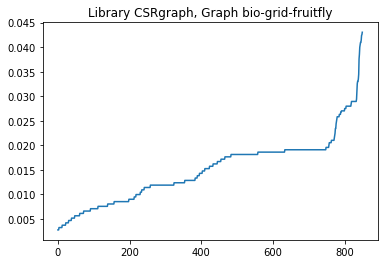

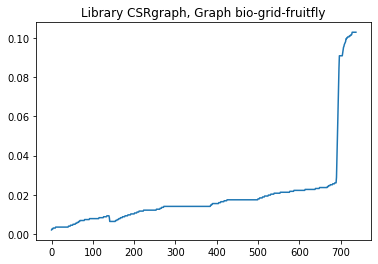

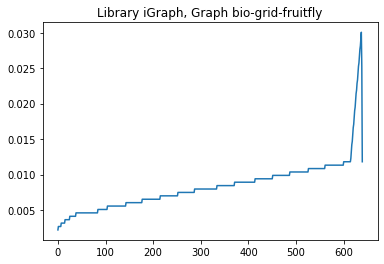

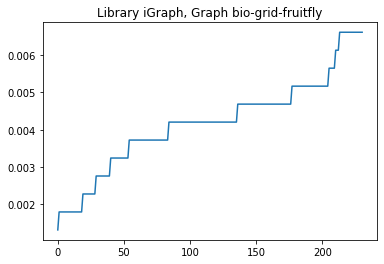

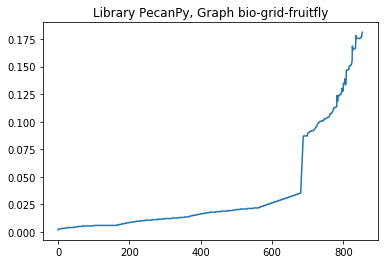

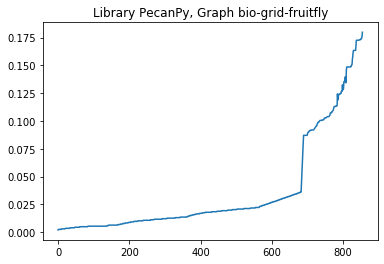

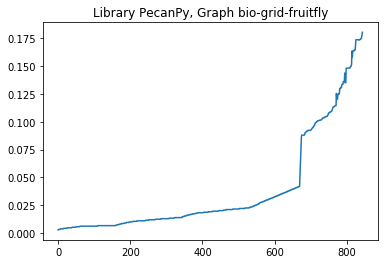

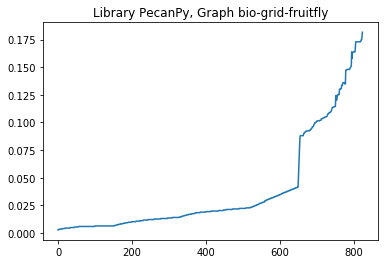

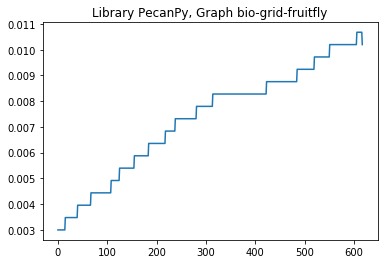

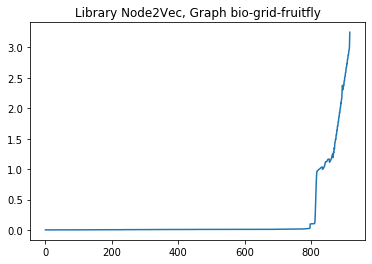

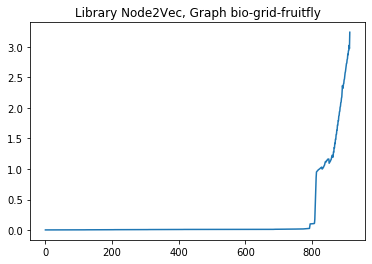

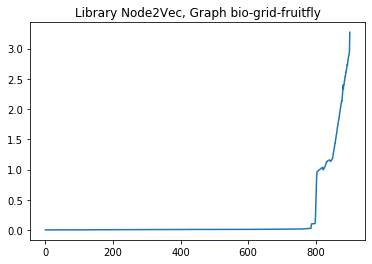

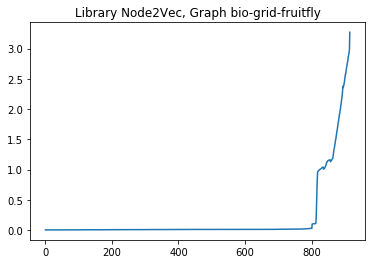

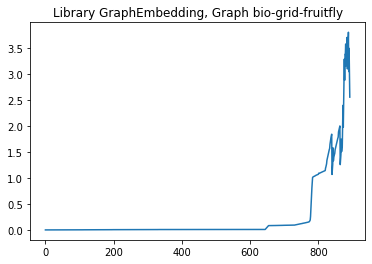

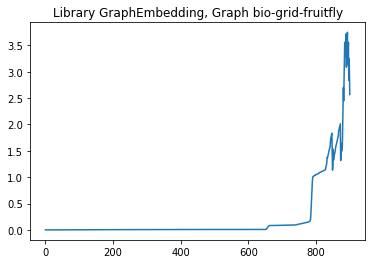

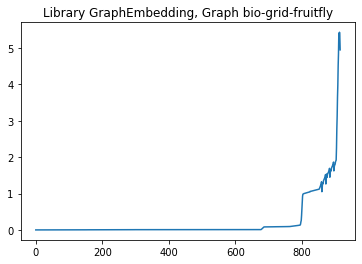

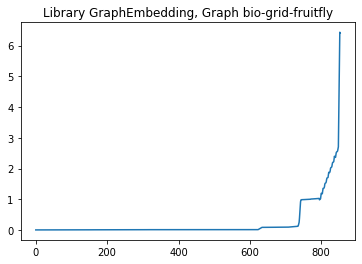

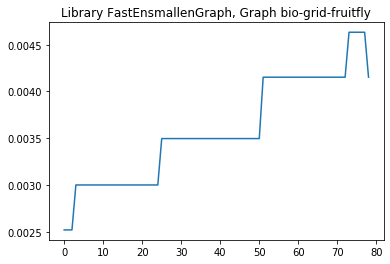

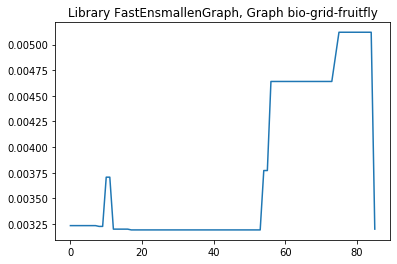

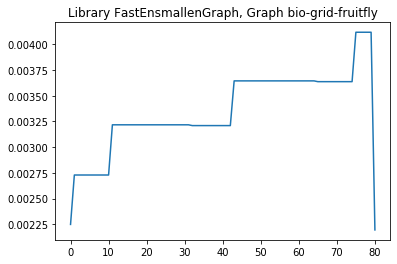

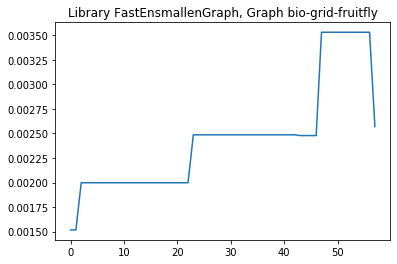

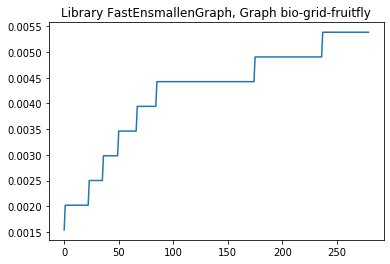

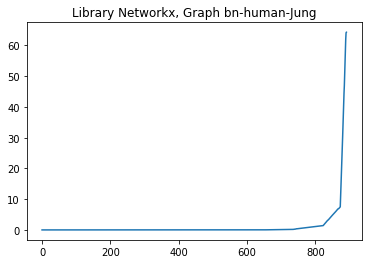

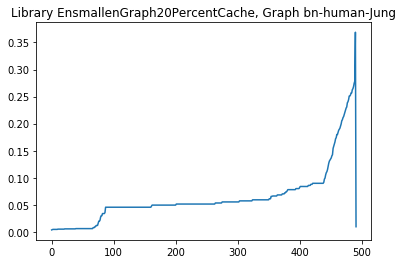

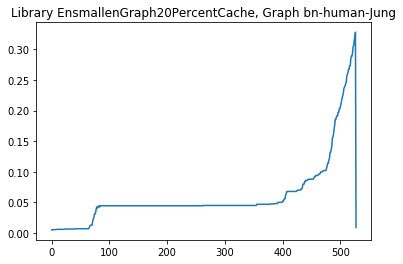

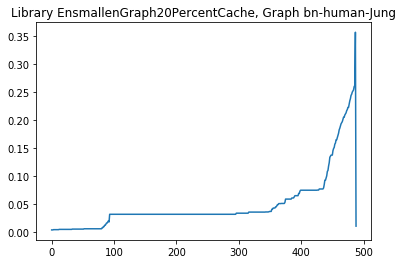

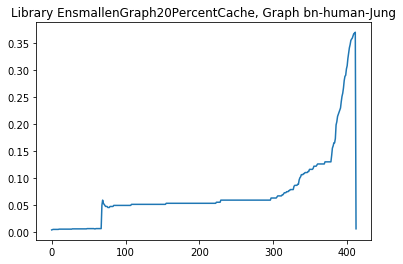

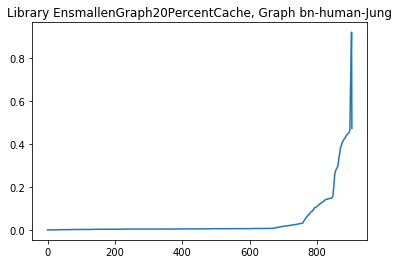

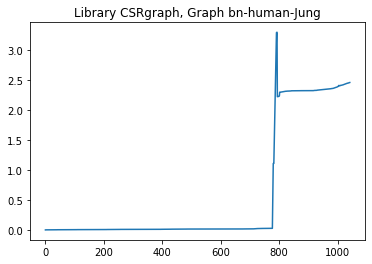

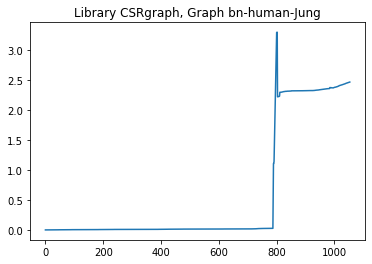

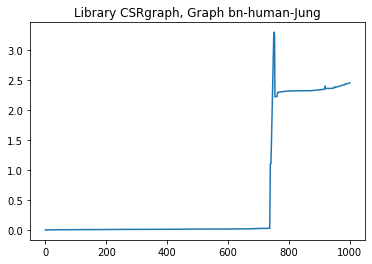

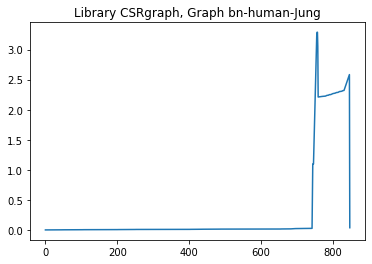

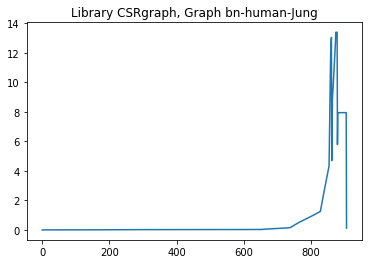

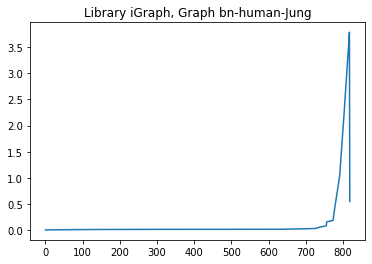

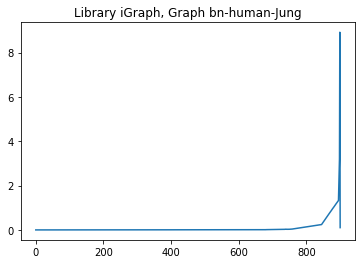

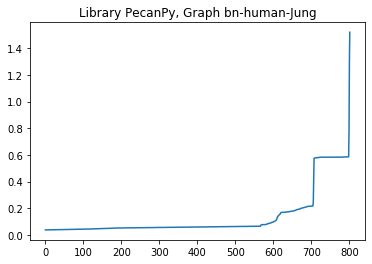

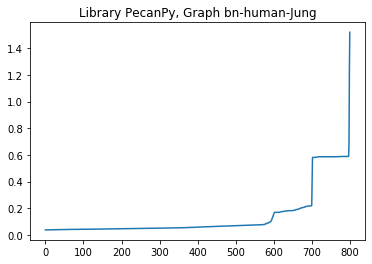

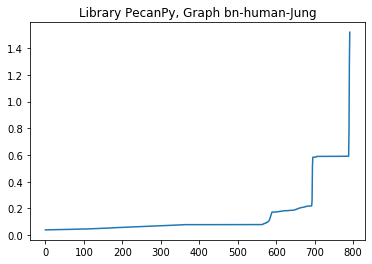

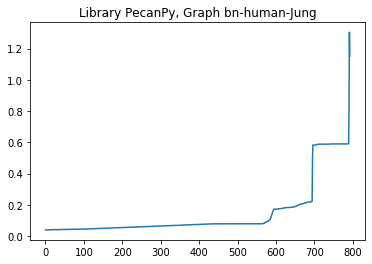

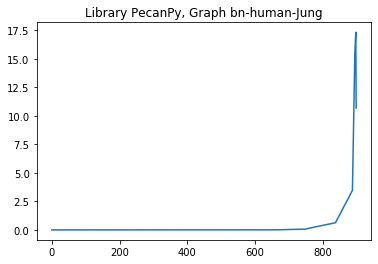

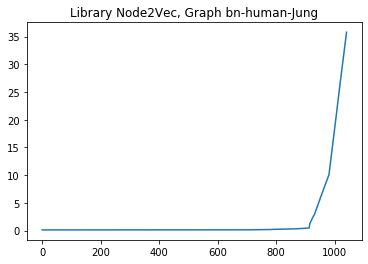

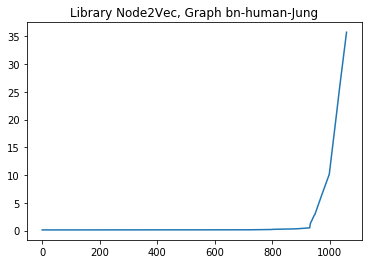

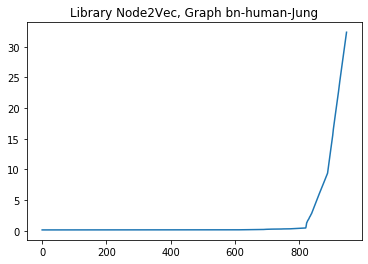

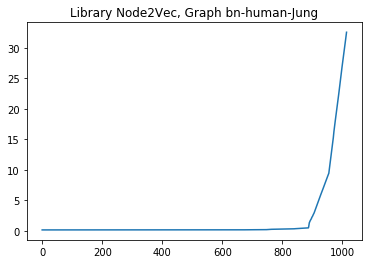

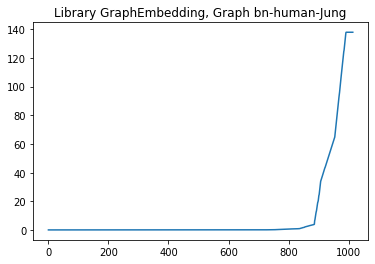

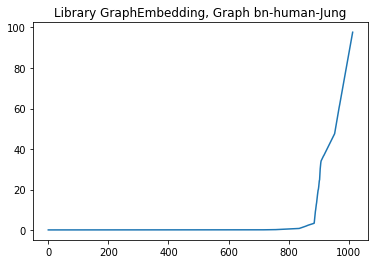

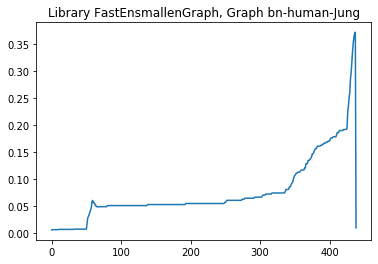

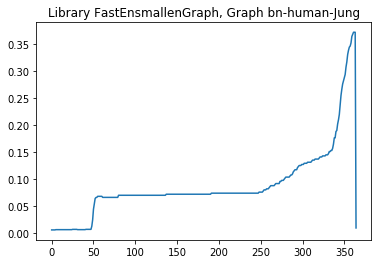

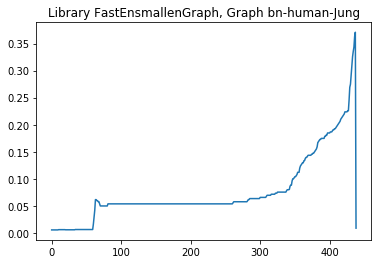

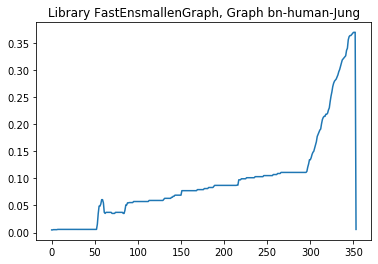

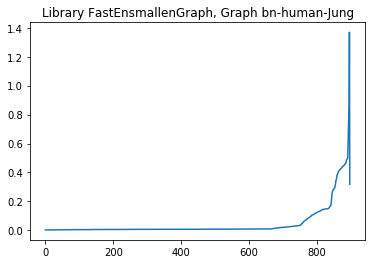

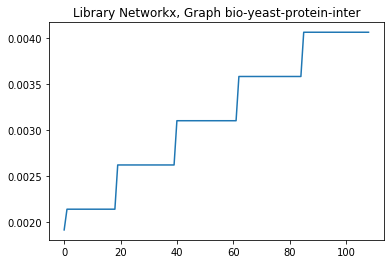

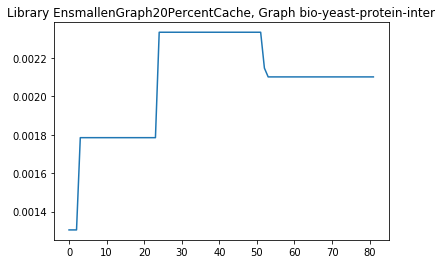

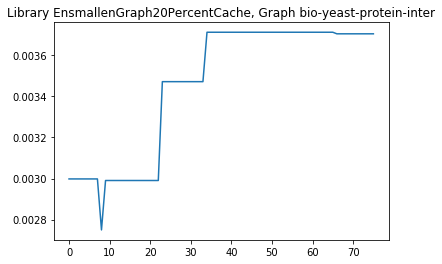

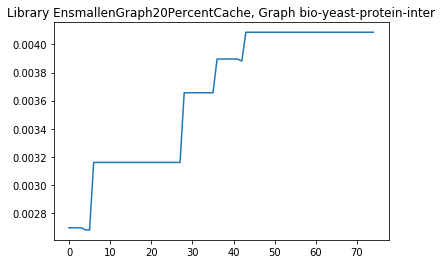

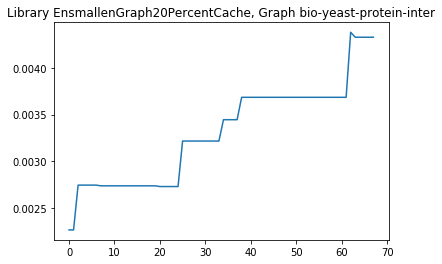

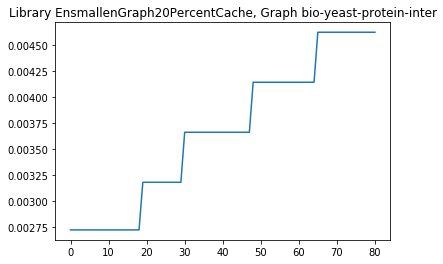

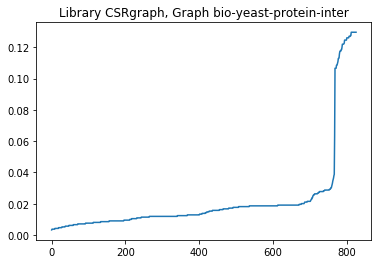

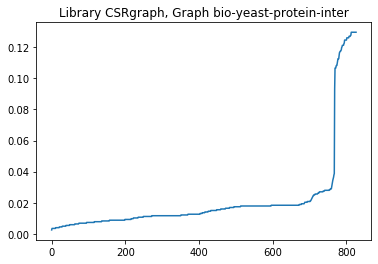

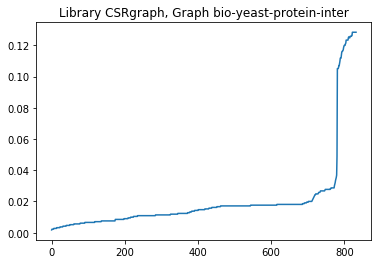

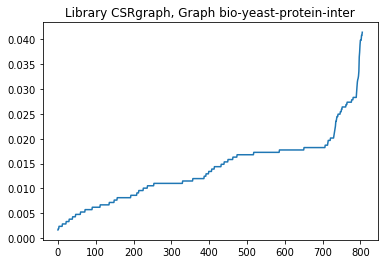

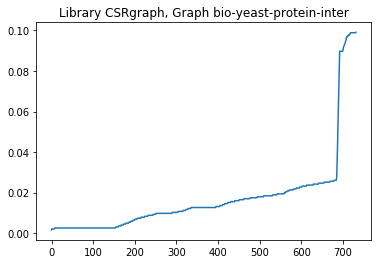

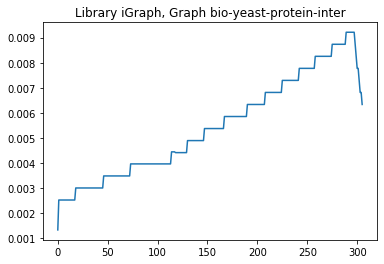

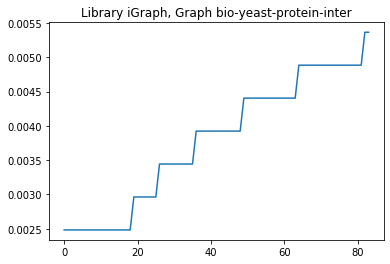

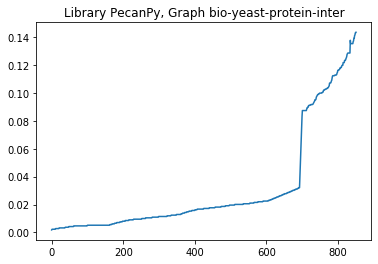

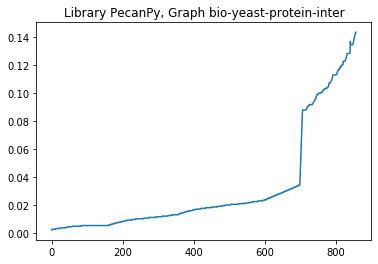

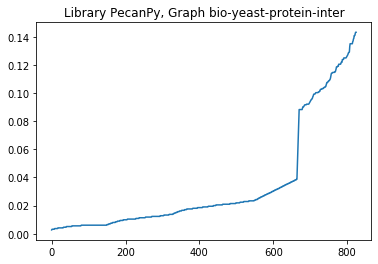

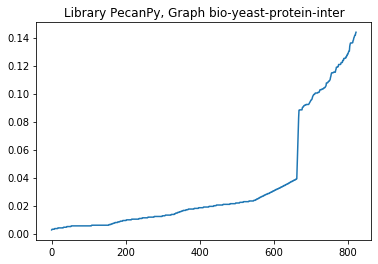

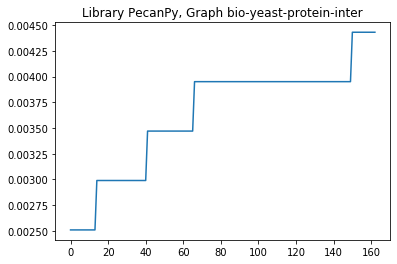

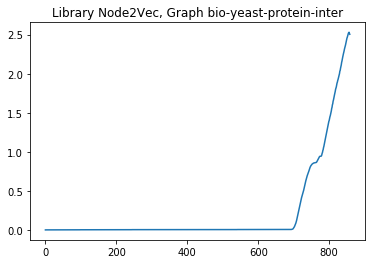

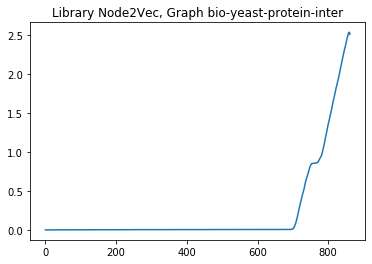

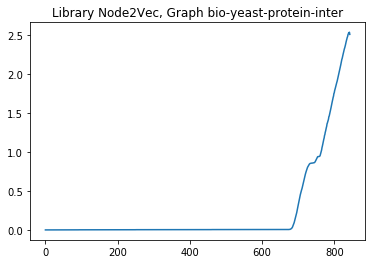

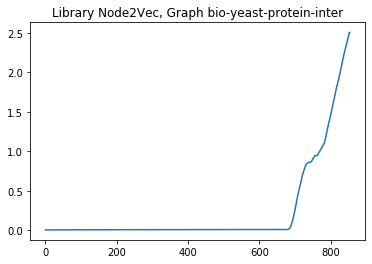

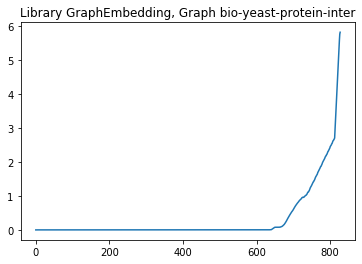

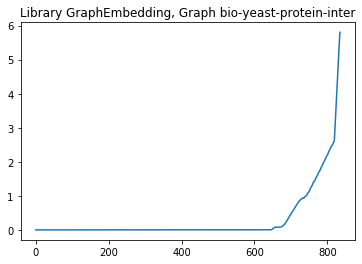

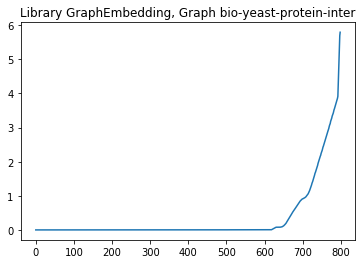

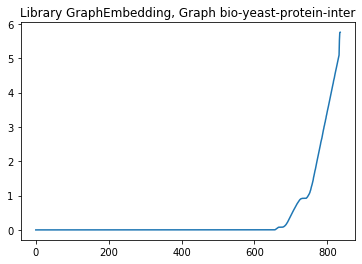

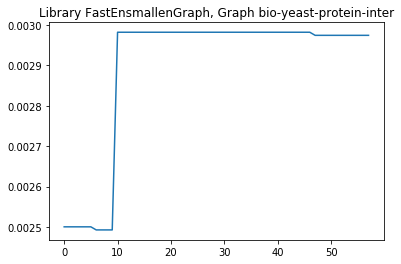

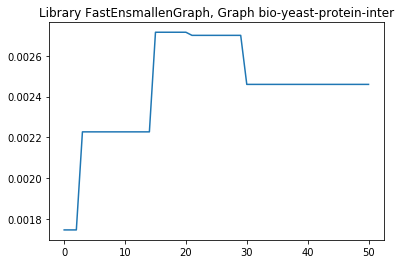

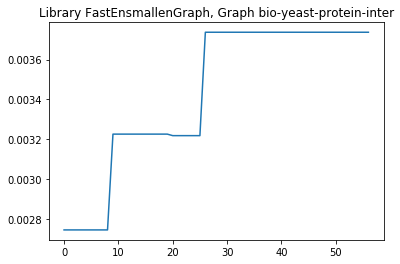

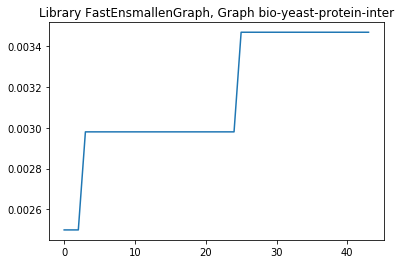

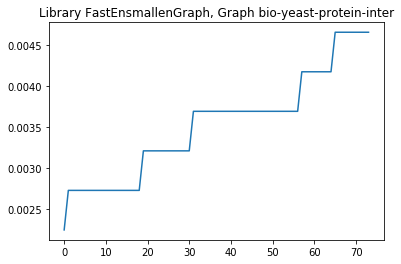

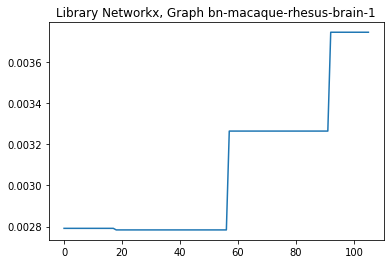

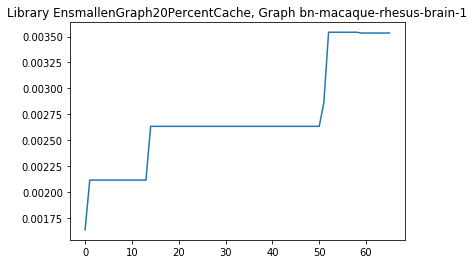

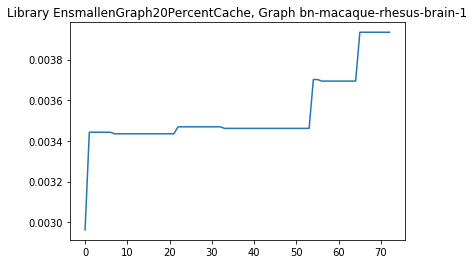

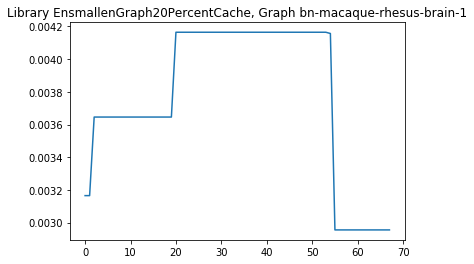

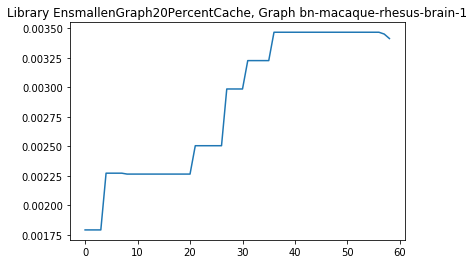

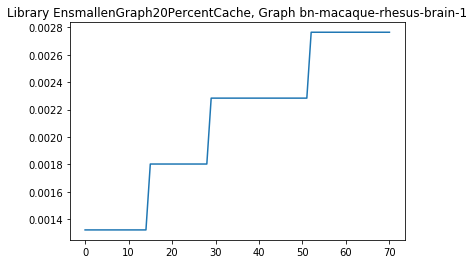

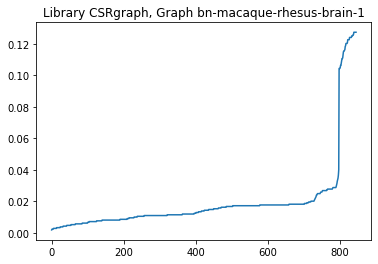

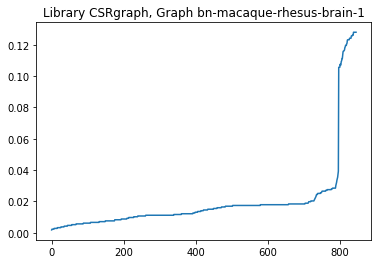

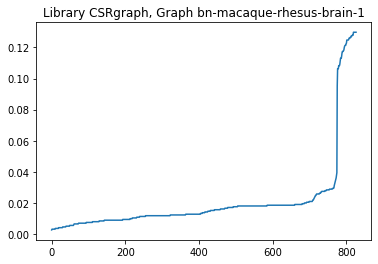

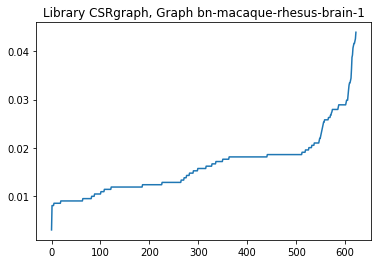

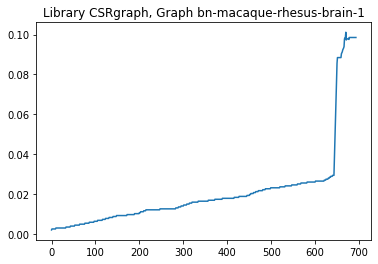

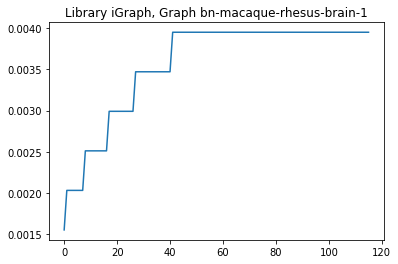

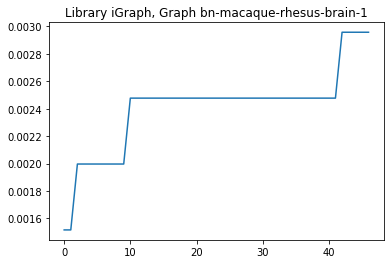

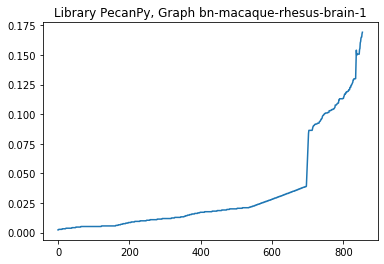

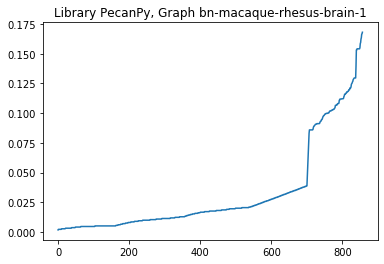

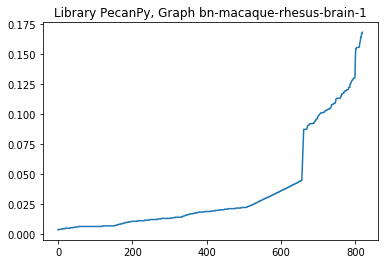

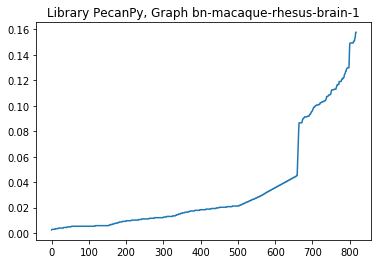

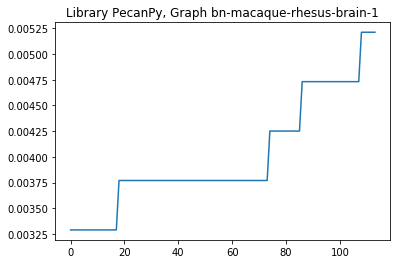

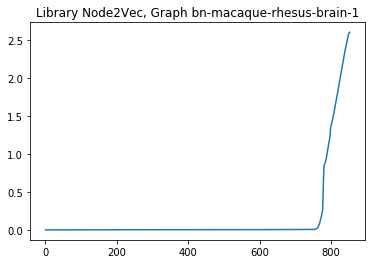

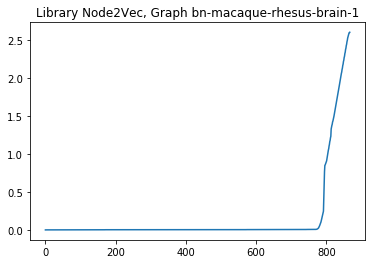

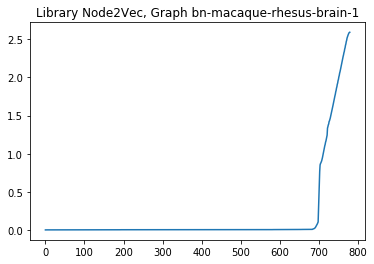

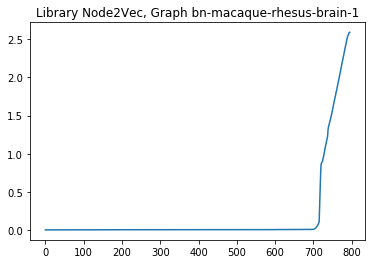

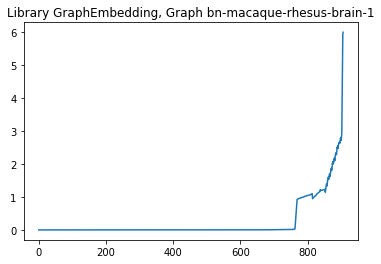

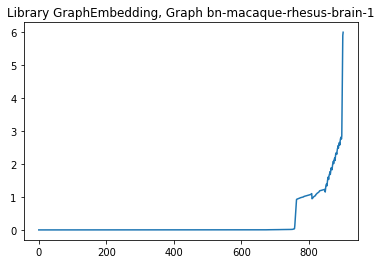

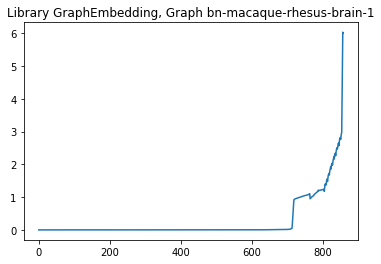

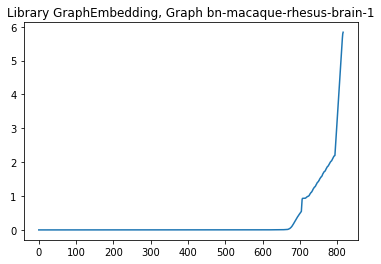

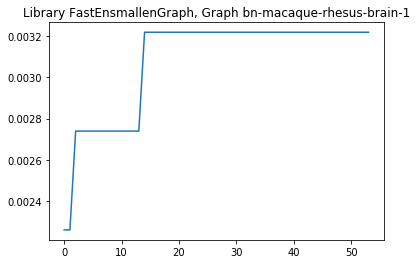

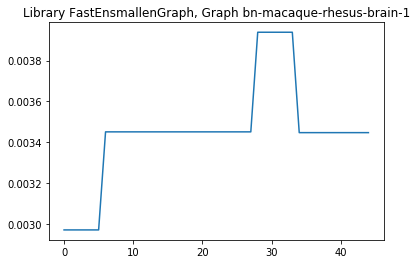

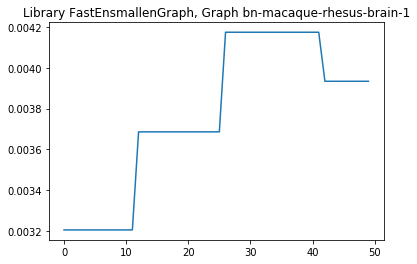

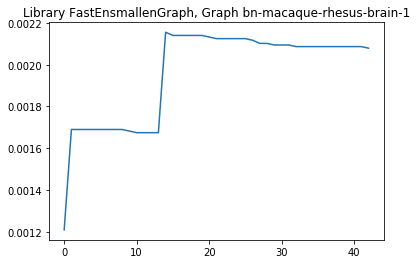

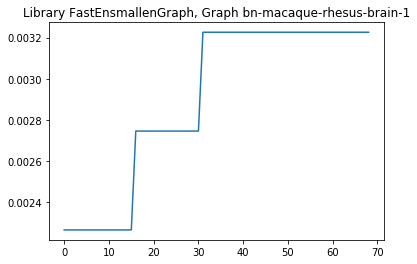

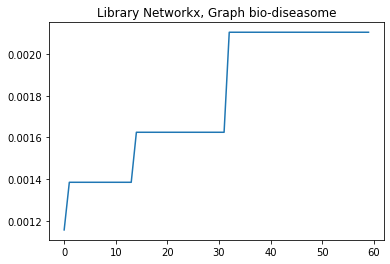

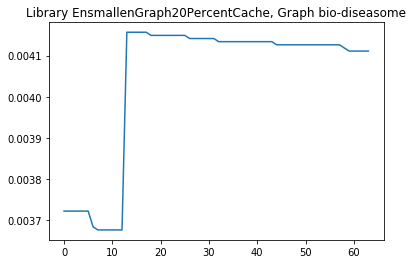

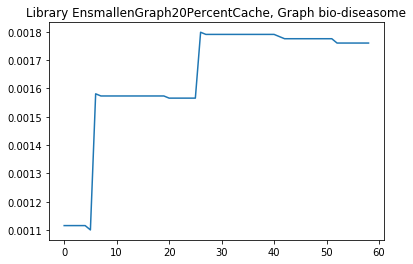

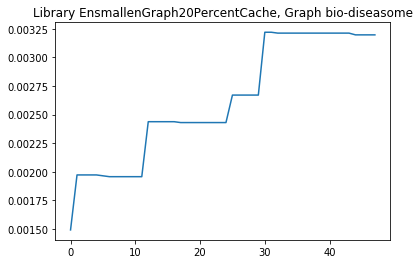

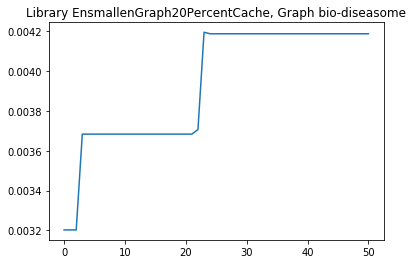

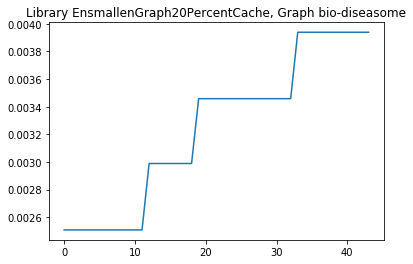

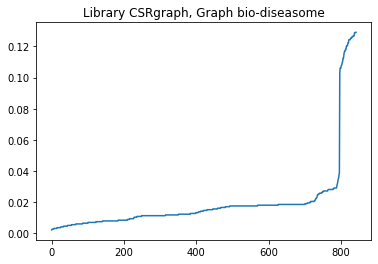

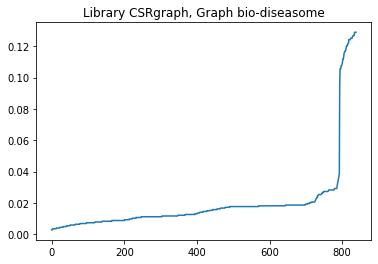

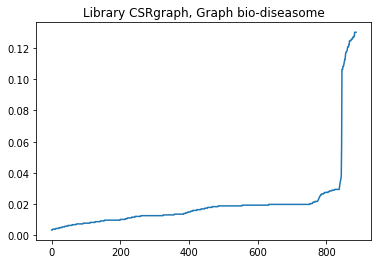

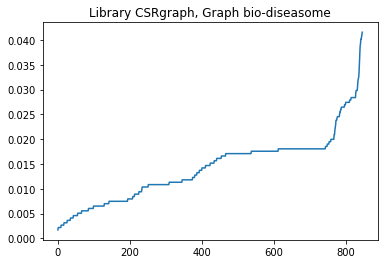

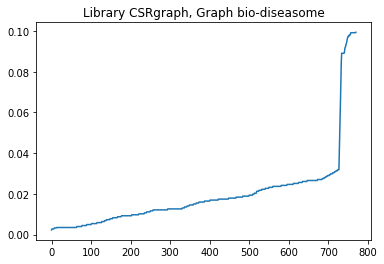

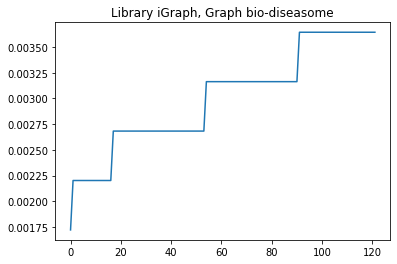

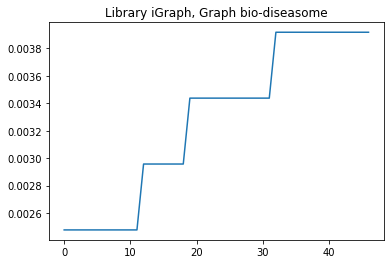

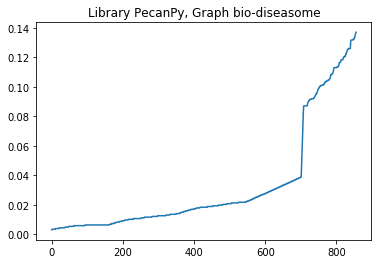

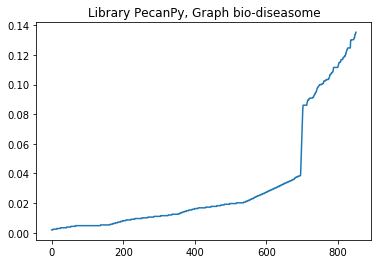

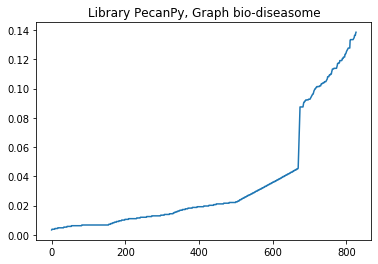

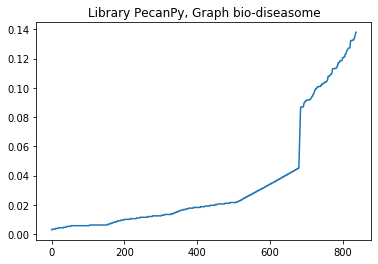

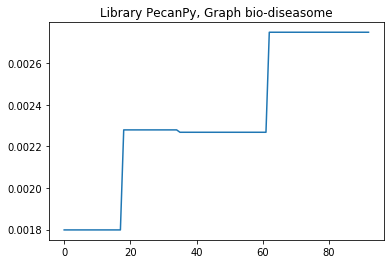

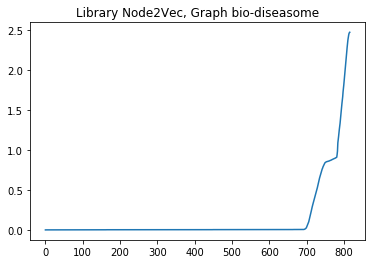

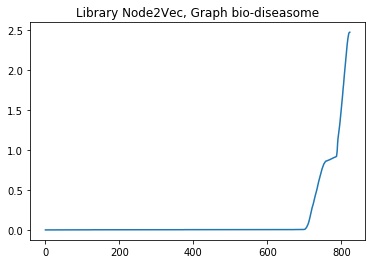

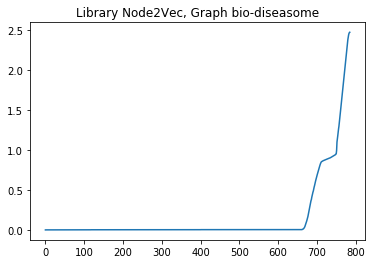

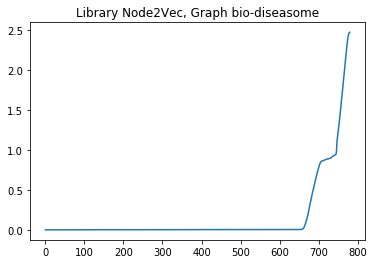

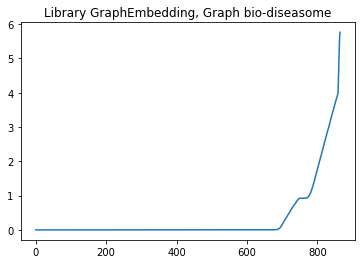

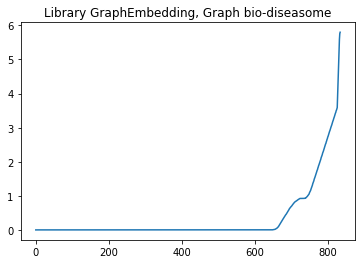

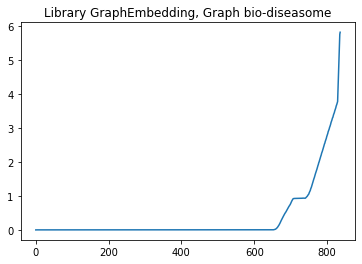

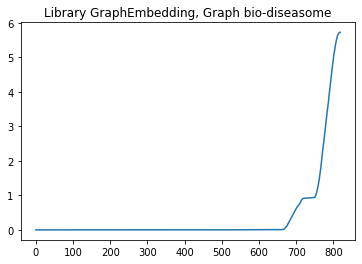

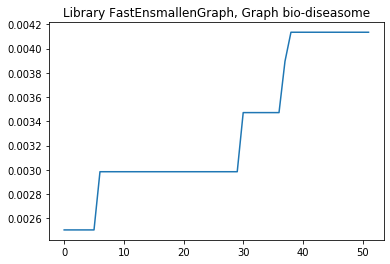

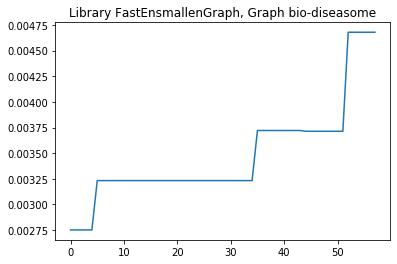

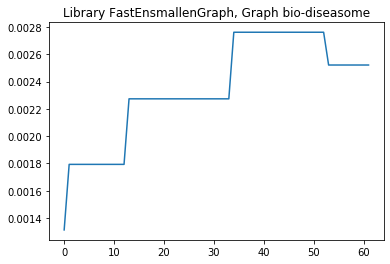

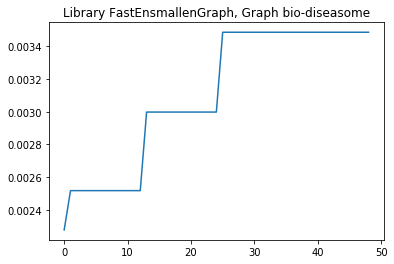

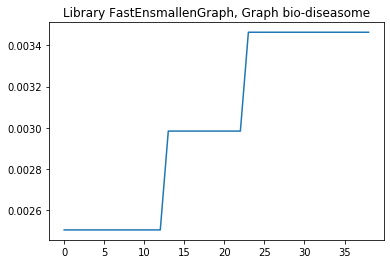

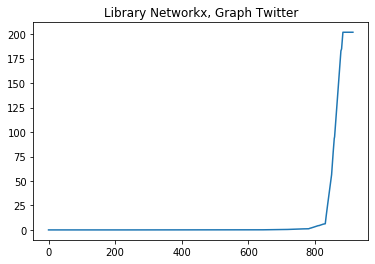

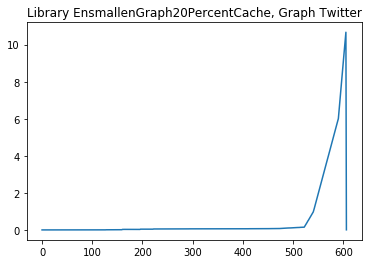

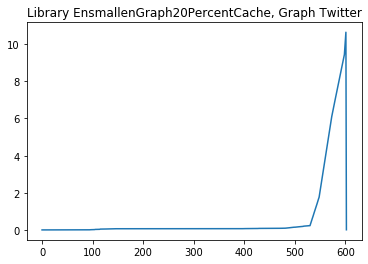

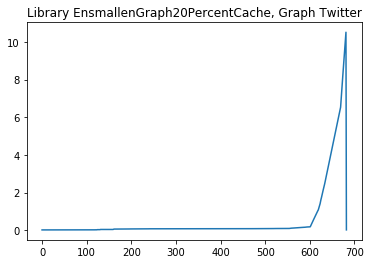

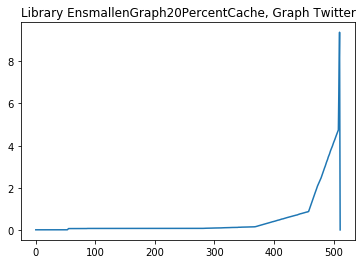

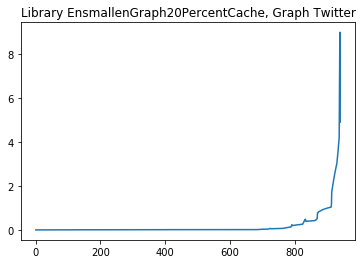

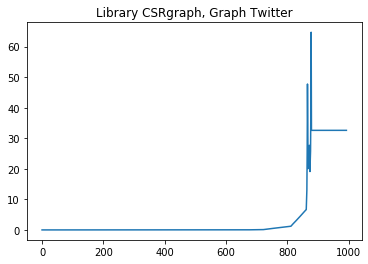

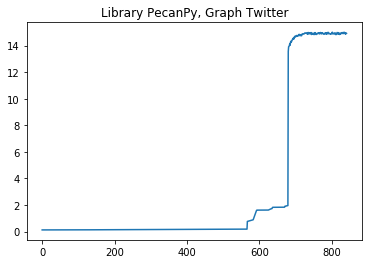

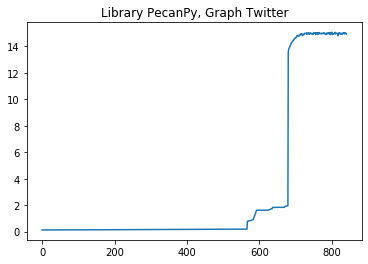

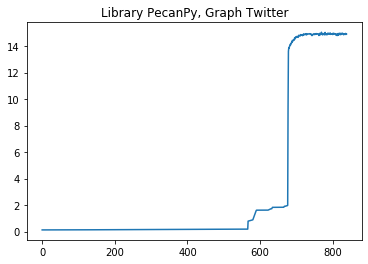

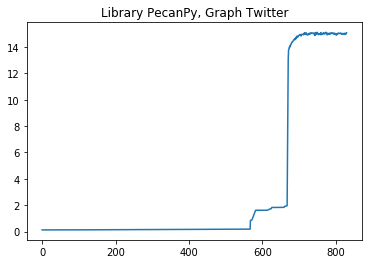

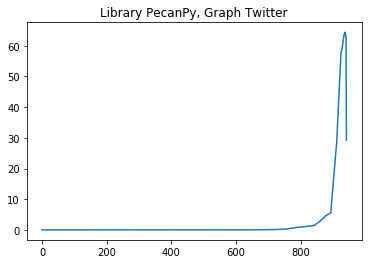

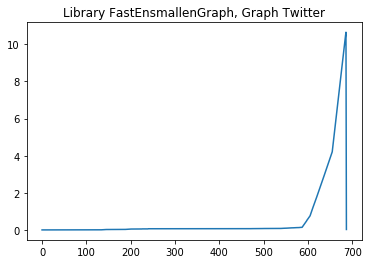

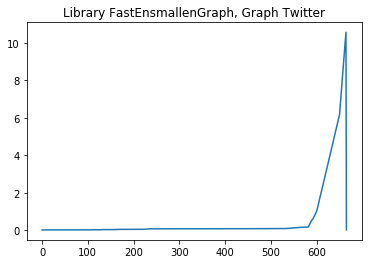

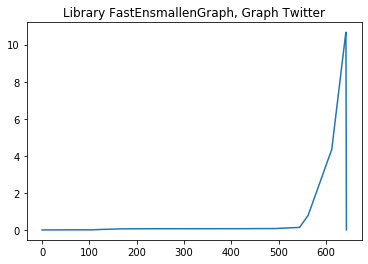

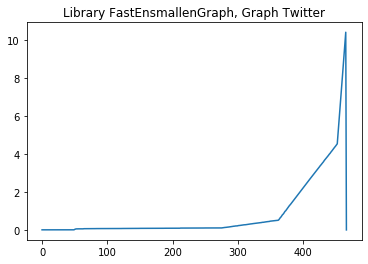

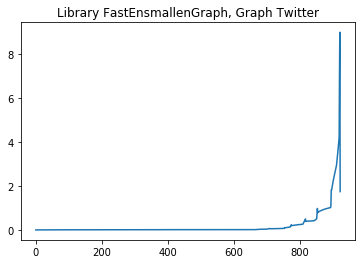

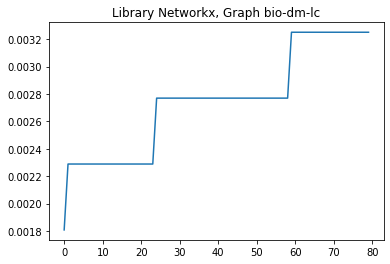

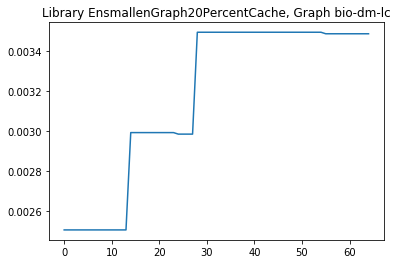

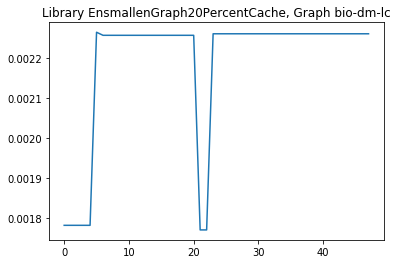

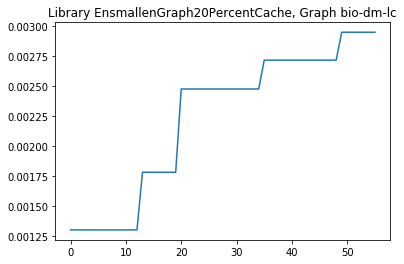

KeyboardInterrupt: 

In [8]:
reports = pd.DataFrame([
    compress_json.load(path)
    for path in glob("graphs/**/*.json", recursive=True)
])

reports.rename(
    columns={
        "name":"graph"
    },
    inplace=True
)

for col in reports.columns:
    try:
        reports[col]=pd.to_numeric(reports[col])
    except:
        pass
    
results = pd.concat([
    load_results(path)
    for path in tqdm(
        glob("results/**/*.csv", recursive=True),
        desc="Loading reports"
    )
])

results.merge(reports, on="graph")